age group vs imdb rating scatter plot

genre vs imdb rating set of histograms

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
streaming = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv').set_index('ID').drop('Unnamed: 0', axis = 1)
imdb = pd.read_csv('imdb.csv')
imdb['date_published'] = pd.to_datetime(imdb['date_published'], errors = 'coerce')
imdb.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [14]:
imdb_subset = imdb[['title','original_title','date_published','avg_vote']]
streaming_subset = streaming[['Title','Genres','Age','Runtime']]
streaming_subset['Streaming'] = streaming[['Netflix','Hulu','Prime Video','Disney+']].apply(sum,axis = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
joined = pd.merge(streaming_subset,imdb_subset, how = 'inner',right_on = 'original_title',left_on = 'Title')

In [16]:
display(joined.head())
len(joined) #7345 when using title, 10149 when using original title, started with 16744
joined['Age'].unique()
age_rating = pd.CategoricalDtype(['all','7+','13+','16+','18+','nan'])
joined.groupby('Age').agg([np.nanmean,np.std])

,Title,Genres,Age,Runtime,Streaming,title,original_title,date_published,avg_vote
0,Inception,"Action,Adventure,Sci-Fi,Thriller",13+,148.0,1,Inception,Inception,2010-09-24,8.8
1,The Matrix,"Action,Sci-Fi",18+,136.0,1,Matrix,The Matrix,1999-05-07,8.7
2,Avengers: Infinity War,"Action,Adventure,Sci-Fi",13+,149.0,1,Avengers: Infinity War,Avengers: Infinity War,2018-04-25,8.4
3,Back to the Future,"Adventure,Comedy,Sci-Fi",7+,116.0,1,Ritorno al futuro,Back to the Future,1985-10-18,8.5
4,Spider-Man: Into the Spider-Verse,"Animation,Action,Adventure,Family,Sci-Fi",7+,117.0,1,Spider-Man: Un nuovo universo,Spider-Man: Into the Spider-Verse,2018-12-25,8.4


Runtime            Streaming            avg_vote          
        nanmean        std   nanmean       std   nanmean       std
Age                                                               
13+  107.580184  24.848713  1.136778  0.363852  5.958764  1.203524
16+   97.549020  18.016418  1.090909  0.288418  5.203896  1.271605
18+   99.182398  18.656451  1.080360  0.283898  5.535345  1.243879
7+   104.623377  23.761924  1.073852  0.261661  5.894810  1.197881
all  103.783908  62.613762  1.054422  0.227106  6.093424  1.205509

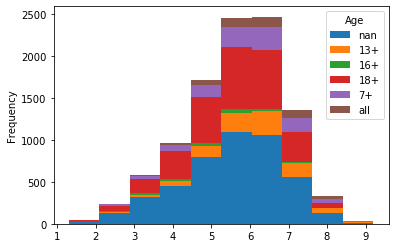

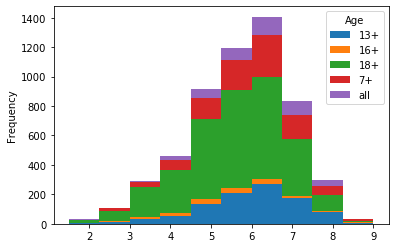

In [17]:
joined.pivot(columns = 'Age')['avg_vote'].plot(kind = 'hist', stacked=True)
joined.dropna(subset = ['Age']).pivot(columns = 'Age')['avg_vote'].plot(kind = 'hist', stacked=True)

In [18]:
genres = []
vals=[]
errors = []

for x in joined['Genres'].unique():
    gs = str(x).split(',')
    for gen in gs:
        if gen in genres:
            continue
        else:
            genres.append(gen)

for g in genres:
    movies = joined[joined['Genres'].map(lambda x: g in str(x))]
    vals.append(np.nanmean(movies['avg_vote']))
    errors.append(np.std(movies['avg_vote']))

<ErrorbarContainer object of 3 artists>

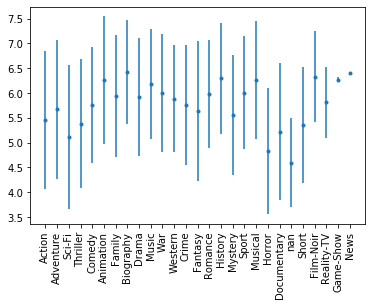

In [19]:
plt.xticks(rotation = 90)
plt.errorbar(genres, vals, errors,fmt = '.')

In [20]:
joined.dtypes

Title                     object
Genres                    object
Age                       object
Runtime                  float64
Streaming                  int64
title                     object
original_title            object
date_published    datetime64[ns]
avg_vote                 float64
dtype: object

(0, 200)

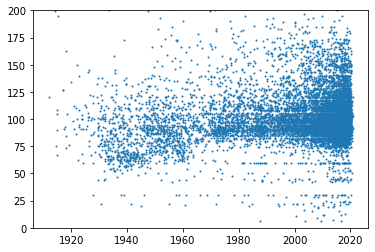

In [23]:
fig,ax = plt.subplots()
small = joined#.sample(500)
ax.scatter(small['date_published'],small['Runtime'], s=1)
ax.set_ylim(0,200)

array([1, 2, 3])